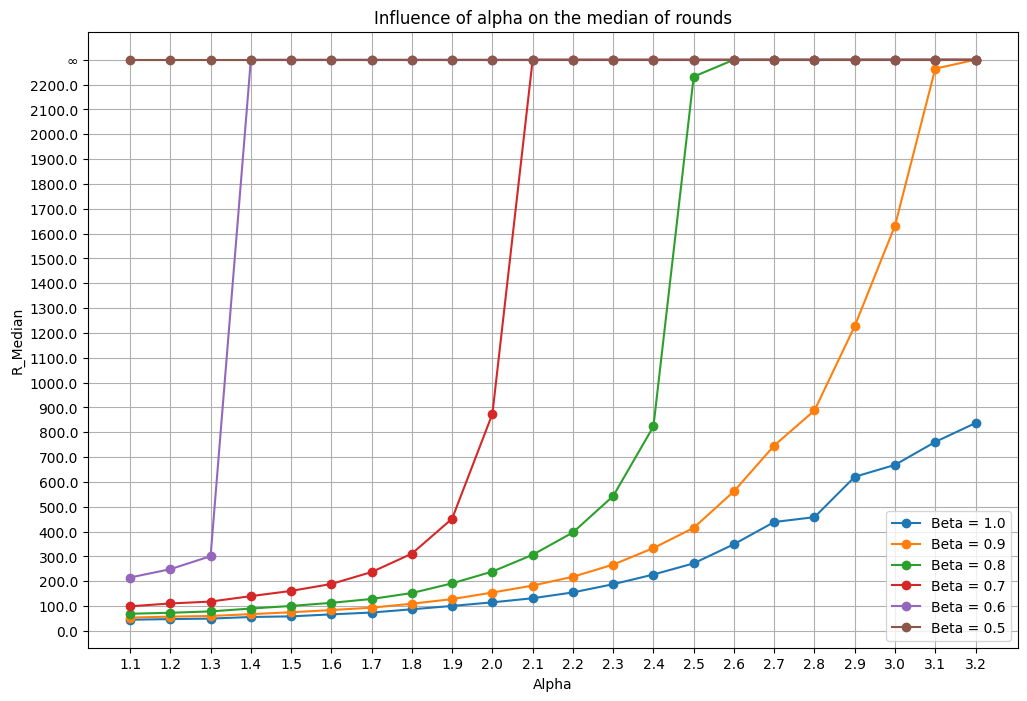

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

file_path = 'covid19-sir-simulation-results-final.csv'  # File path for the CSV file

# Reading data from the CSV file
df_file = pd.read_csv(file_path, sep=';')

# Plotting as before, now using the data from the file
plt.figure(figsize=(12, 8))
unique_betas_file = df_file['beta'].unique()

for beta in unique_betas_file:
    # Filter data for each beta
    subset = df_file[df_file['beta'] == beta].sort_values(by='alpha')  # Sorting by alpha to ensure a proper line plot

    # print(subset)

    representation_of_inf = 2300
    r_medians = subset['r_median'].to_numpy()
    r_medians[np.isinf(r_medians)] = representation_of_inf

    plt.plot(subset['alpha'].to_numpy(), r_medians, marker='o', label=f'Beta = {beta}')  # Using plot to connect dots

    plt.yticks(np.arange(0.0, 2300.0, 100))

    plt.yticks(list(plt.yticks()[0]) + [representation_of_inf], list(plt.yticks()[0]) + ['∞'])

    # Set x-axis ticks in steps of 0.1
    plt.xticks(np.arange(1.1, 3.3, 0.1))


plt.title('Influence of alpha on the median of rounds')
plt.xlabel('Alpha')
plt.ylabel('R_Median')
plt.legend()
plt.grid(True)

current_datetime = datetime.datetime.now()
formatted_datetime = current_datetime.strftime("%Y-%m-%d-%H-%M-%S")

plt.savefig("covid19-sir-simulation-alpha-visualization-" + formatted_datetime)
plt.show()